<a href="https://colab.research.google.com/github/Naganadel17/private/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/Colab Notebooks
0: loss=1.0978042594066821 acc=33.33333333333335
100: loss=0.5258706855179545 acc=75.99999999999999
200: loss=0.29174530156118217 acc=97.33333333333347
300: loss=0.18510693876974335 acc=98.00000000000014
400: loss=0.1399812300445838 acc=98.66666666666681
500: loss=0.11856917997024816 acc=98.00000000000014
600: loss=0.10669013281068859 acc=98.00000000000014
700: loss=0.09928612912225862 acc=98.00000000000014
800: loss=0.0942729447962586 acc=98.00000000000014
900: loss=0.09066740067806045 acc=98.00000000000014


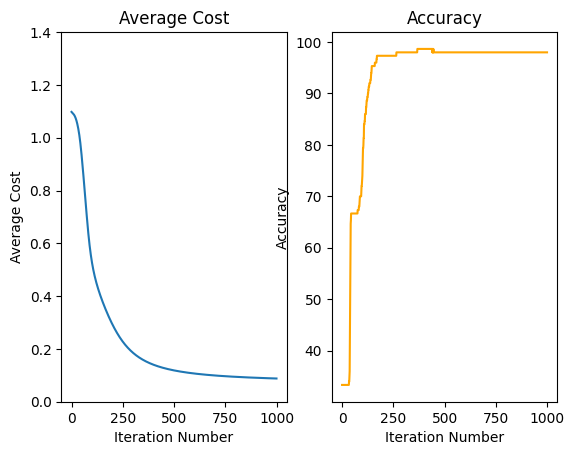

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/Colab Notebooks/

iris = pd.read_csv("Iris.csv")

labels = {"Iris-setosa":0,
          "Iris-versicolor":1,
          "Iris-virginica":2
          }

x = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y = iris['Species'].values
y = np.array([labels[label] for label in y])

epochs = 1000
learning_rate = 0.05
reg = 0.001

losses = []
accs = []

W1 = np.random.randn(4, 100) * 0.01
b1 = np.zeros((1, 100))
W2 = np.random.randn(100, 3) * 0.01
b2 = np.zeros((1, 3))


for epoch in range(epochs):
    h = np.maximum(0, x.dot(W1) + b1)
    f = h.dot(W2) + b2

    p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
    dhidden = p.copy()
    dhidden[range(x.shape[0]), y] -= 1
    dhidden /= x.shape[0]
    dW2 = (h.T).dot(dhidden) + reg * W2
    db2 = np.sum(dhidden, axis=0, keepdims=True)

    drelu = (dhidden).dot(W2.T)
    drelu[h <= 0] = 0

    dW1 = (x.T).dot(drelu) + reg * W1
    db1 = np.sum(drelu, axis=0, keepdims=True)

    W1 -= learning_rate * dW1;
    W2 -= learning_rate * dW2;
    b1 -= learning_rate * db1;
    b2 -= learning_rate * db2;

    hidd = np.maximum(0, x.dot(W1) + b1)
    scores = hidd.dot(W2) + b2
    pred = np.argmax(scores, axis=1)

    acc = (pred==y) / float(y.shape[0])
    accs.append(sum(acc) * 100)

    data_loss = -np.sum(np.log(p[range(x.shape[0]), y])) / x.shape[0]
    reg_loss = 0.5 * reg * (np.sum(W2**2) + np.sum(W1**2))
    loss = data_loss + reg_loss
    losses.append(loss)
    if epoch % 100 == 0:
        print("{}: loss={} acc={}".format(epoch, loss, sum(acc * 100)))

ax = plt.subplot(1,2,1)
plt.ylim(0,1.4)
plt.plot(losses)
plt.title('Average Cost')
plt.ylabel('Average Cost')
plt.xlabel('Iteration Number')

bx = plt.subplot(1,2,2)
plt.plot(accs, color='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration Number')
plt.show()
